# <font color = blue>[Data Cleaning]</font>

## <font color = blue>Import Packages</font>

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

## <font color = blue>Import Data</font>

In [193]:
brands_df = pd.read_csv("sample_brands - data.csv")
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand_id             5839 non-null   int64  
 1   created              5839 non-null   object 
 2   lastActive           5831 non-null   object 
 3   planLevel            5839 non-null   int64  
 4   num_sub_user         5839 non-null   int64  
 5   role                 5833 non-null   object 
 6   industry_categories  5816 non-null   object 
 7   bantScore            1295 non-null   float64
 8   companySize          2406 non-null   object 
 9   onboarding_stage     5600 non-null   float64
 10  country              4835 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 501.9+ KB


In [194]:
brands_df.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,country
0,1,2021/8/31 19:18,2021/8/31 19:20,0,1,brand,[],NaN,NaN,NaN,NaN
1,2,2020/8/28 4:38,2021/1/7 21:10,0,1,brand,[],NaN,NaN,4.0,United States
2,3,2020/8/21 13:55,2020/10/28 12:53,0,1,brand,[],NaN,NaN,4.0,NaN
3,4,2021/7/1 16:46,2021/7/1 16:46,0,1,founder,[],NaN,NaN,2.0,United States
4,5,2019/12/2 21:57,2019/12/20 17:35,0,1,brand,[],NaN,NaN,4.0,India


In [195]:
brands_df.shape

(5839, 11)

## <font color = blue>Data Cleaning </font>

- ###  <font color = blue>Change Data Types </font>

In [196]:
brands_df['created'] = pd.to_datetime(brands_df['created']) #Change time variable into datetime type
brands_df['lastActive'] = pd.to_datetime(brands_df['lastActive'])

In [197]:
brands_df.dtypes

brand_id                        int64
created                datetime64[ns]
lastActive             datetime64[ns]
planLevel                       int64
num_sub_user                    int64
role                           object
industry_categories            object
bantScore                     float64
companySize                    object
onboarding_stage              float64
country                        object
dtype: object

- ###  <font color = blue>Split Variables </font>

In [198]:
#Deal with industry categories

In [199]:
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace('[','') #Remove Brackets
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace(']','') 

In [200]:
# Create Dummy variables of industry categories
temp1 = pd.get_dummies(brands_df['industry_categories'].str.split(',').apply(pd.Series), prefix='cate_')
temp1 = temp1.drop('cate__',axis=1) # Delete useless columns
temp1['category_num'] = temp1.iloc[:,1:3164].sum(axis=1)

In [201]:
temp1 

,cate__'Advertising',cate__'Apparel & Jewelry',cate__'Apparel',cate__'Application Software',cate__'Art',cate__'Automobiles',cate__'Banks',cate__'Belts',cate__'Beverage',cate__'Capital Goods',...,cate__ 'Costumes',cate__ 'Headwear',cate__ 'Dresses',cate__ 'Brooches & Pins',cate__ 'Bridal Accessories',cate__ 'Belts',cate__ 'Sashes',cate__ 'Footwear',cate__ 'Skirts',category_num
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5837,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [202]:
brands_clean = pd.concat([brands_df,temp1],axis =1)

In [203]:
brands_clean.shape

(5839, 3175)

In [204]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,...,cate__ 'Costumes',cate__ 'Headwear',cate__ 'Dresses',cate__ 'Brooches & Pins',cate__ 'Bridal Accessories',cate__ 'Belts',cate__ 'Sashes',cate__ 'Footwear',cate__ 'Skirts',category_num
0,1,2021-08-31 19:18:00,2021-08-31 19:20:00,0,1,brand,,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,,NaN,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,,NaN,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,,NaN,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,,NaN,NaN,4.0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
brands_clean['category_num'].value_counts()

0      3523
1       704
2       540
3       278
4       230
5       166
6        97
7        59
8        49
9        43
10       25
11       21
12       17
14       14
13       11
15       10
16        7
18        5
19        5
20        3
27        3
17        3
29        2
21        2
31        2
37        2
22        2
318       2
28        1
23        1
66        1
58        1
42        1
24        1
40        1
41        1
88        1
172       1
30        1
26        1
241       1
109       1
Name: category_num, dtype: int64

In [206]:
#Find out which record covers '318' different industry categories
brands_clean.loc[brands_clean['category_num']==318]

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,...,cate__ 'Costumes',cate__ 'Headwear',cate__ 'Dresses',cate__ 'Brooches & Pins',cate__ 'Bridal Accessories',cate__ 'Belts',cate__ 'Sashes',cate__ 'Footwear',cate__ 'Skirts',category_num
2565,2566,2021-02-07 17:29:00,2021-02-07 17:37:00,0,1,entrepreneur,"'Apparel & Jewelry', 'Textiles', 'Footwear', '...",NaN,less than 10 employees,4.0,...,1,0,1,1,1,0,1,0,1,318
2624,2625,2020-02-23 06:55:00,2020-02-23 07:59:00,0,1,brand,"'Food & Beverage', 'Snacks', 'Fast Food', 'Pac...",NaN,NaN,4.0,...,0,1,1,1,1,1,0,1,0,318


- ###  <font color = blue>Format Variables </font>

In [207]:
#Deal with 'Companysize'

In [209]:
brands_clean['companySize'].value_counts() #5 Level intotal

less than 10 employees    1765
10 - 49 employees          454
50 - 249 employees         111
1000 employees              45
250 - 999 employees         31
Name: companySize, dtype: int64

In [210]:
#Use number from 1-5 to replace the company size text, 1 represents 'less than 10 employees' and 5 represents '1000+ employees'
brands_clean['companySize'] = brands_clean['companySize'].str.replace('less than 10 employees','1')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('10 - 49 employees','2')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('50 - 249 employees','3')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('250 - 999 employees','4')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('1000 employees','5')
brands_clean['companySize'] = brands_clean['companySize'].fillna(0) #Define those records without information of the company size as 0


In [211]:
brands_clean['companySize'].value_counts()

0    3433
1    1765
2     454
3     111
5      45
4      31
Name: companySize, dtype: int64

- ###  <font color = blue>Deal with NA Data </font>

In [212]:
brands_clean = brands_clean.drop('industry_categories',axis = 1) #Delete Useless Column 'industry_categories'
brands_clean.isnull().sum().sort_values(ascending=False).head(10) #Find out missing values

bantScore                          4544
country                            1004
onboarding_stage                    239
lastActive                            8
role                                  6
category_num                          0
cate__ 'Perfumes'                     0
cate__ 'Outdoors'                     0
cate__ 'Outerwear'                    0
cate__ 'Packaged Foods & Meats'       0
dtype: int64

In [133]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,cate__ 'Costumes',cate__ 'Headwear',cate__ 'Dresses',cate__ 'Brooches & Pins',cate__ 'Bridal Accessories',cate__ 'Belts',cate__ 'Sashes',cate__ 'Footwear',cate__ 'Skirts',category_num
0,1,2021-08-31 19:18:00,2021-08-31 19:20:00,0,1,brand,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,NaN,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,0
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,NaN,0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,NaN,0,2.0,United States,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,NaN,0,4.0,India,...,0,0,0,0,0,0,0,0,0,0


In [225]:
#Deal with bantscore
#Use Mean to fulfill the missing values
brands_clean["bantScore"]=brands_clean["bantScore"].fillna(int(brands_clean["bantScore"].mean()))

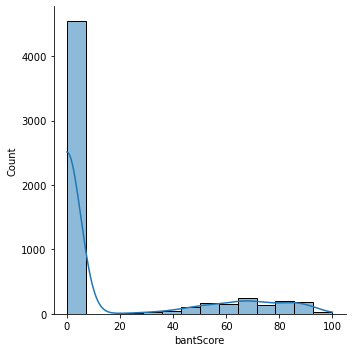

In [224]:
sns.displot(data=brands_clean["bantScore"], kde=True)
#From the bar plot, we can see that the scores are concentrated in 0 to 10

In [229]:
#Deal with country
#Use 'Other' to fulfill the missing values
brands_clean["country"]=brands_clean["country"].fillna('Other')

In [233]:
brands_clean.country.value_counts().sort_values(ascending=False)

United States                4074
Other                        1004
United Kingdom                208
India                         167
Canada                         79
                             ... 
Panama                          1
Botswana                        1
North Macedonia                 1
Taiwan, Province of China       1
New Zealand                     1
Name: country, Length: 88, dtype: int64

In [236]:
#Deal with last Active
#Use the time of created as last active to fullfill the missing values
brands_clean["lastActive"]=brands_clean["lastActive"].fillna(brands_clean["created"])

In [238]:
#Deal with role
#Use 'Other' to fulfill the missing values
brands_clean["role"]=brands_clean["role"].fillna('Other')

In [240]:
#Deal with onboarding_stage
#Delete the missing values
brands_clean = brands_clean.dropna()

In [241]:
brands_clean.isnull().sum().sort_values(ascending=False).head(10) #There is no missing values left

category_num                       0
cate__ 'Pet Food'                  0
cate__ 'Personal Computers'        0
cate__ 'Personal Coaching'         0
cate__ 'Personal Care'             0
cate__ 'Perfumes'                  0
cate__ 'Pants'                     0
cate__ 'Packaged Foods & Meats'    0
cate__ 'Outerwear'                 0
cate__ 'Outdoors'                  0
dtype: int64

In [243]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,cate__ 'Costumes',cate__ 'Headwear',cate__ 'Dresses',cate__ 'Brooches & Pins',cate__ 'Bridal Accessories',cate__ 'Belts',cate__ 'Sashes',cate__ 'Footwear',cate__ 'Skirts',category_num
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,0.0,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,0
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,0.0,0,4.0,Other,...,0,0,0,0,0,0,0,0,0,0
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,0.0,0,2.0,United States,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,0.0,0,4.0,India,...,0,0,0,0,0,0,0,0,0,0
5,6,2020-08-03 03:04:00,2020-08-03 03:18:00,0,1,brand,0.0,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,0


# <font color = blue>[Feature Engineering]</font>

## <font color = blue>Add New Columns</font>

- ###  <font color = blue>Add Time Related Values</font>

In [249]:
# Split datetime columns into specific month, day and year columns.
columns = ['created','lastActive']
y_list = [list(brands_clean[c].dt.year) for c in columns]
m_list = [list(brands_clean[c].dt.month) for c in columns]
d_list = [list(brands_clean[c].dt.day) for c in columns]

date_list=[y_list,m_list,d_list]
date_suffix = ['year','month','day']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        brands_clean[name] = pd.Categorical(date_list[i][j]) 
brands_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 1 to 5838
Columns: 3181 entries, brand_id to lastActive_day
dtypes: category(6), datetime64[ns](2), float64(2), int64(4), object(3), timedelta64[ns](1), uint8(3163)
memory usage: 17.5+ MB


In [254]:
#Split datetime columns into businessday, monthend and quarterly features
weekday_list = [list(brands_clean[c].dt.weekday) for c in columns]
weekofyear_list = [list(brands_clean[c].dt.weekofyear) for c in columns]
quarter_list = [list(brands_clean[c].dt.quarter) for c in columns]

date_list=[weekday_list,weekofyear_list,quarter_list]
date_suffix = ['weekday','weekofyear','quarter']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        brands_clean[name] = pd.Categorical(date_list[i][j]) 
brands_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 1 to 5838
Columns: 3187 entries, brand_id to lastActive_quarter
dtypes: category(12), datetime64[ns](2), float64(2), int64(4), object(3), timedelta64[ns](1), uint8(3163)
memory usage: 17.5+ MB


In [265]:
# Add Active time variable
brands_clean['active_time']=brands_clean.lastActive.copy()-brands_clean.created.copy()
brands_clean['active_time']= brands_clean['active_time'].dt.days
brands_clean['active_time'].describe()

count    5600.000000
mean       35.062857
std        99.613210
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max       992.000000
Name: active_time, dtype: float64

In [266]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,active_time,lastActive_year,lastActive_month,lastActive_day,created_weekday,created_weekofyear,created_quarter,lastActive_weekday,lastActive_weekofyear,lastActive_quarter
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,0.0,0,4.0,United States,...,132,2021,1,7,4,35,3,3,1,1
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,0.0,0,4.0,Other,...,67,2020,10,28,4,34,3,2,44,4
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,0.0,0,2.0,United States,...,0,2021,7,1,3,26,3,3,26,3
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,0.0,0,4.0,India,...,17,2019,12,20,0,49,4,4,51,4
5,6,2020-08-03 03:04:00,2020-08-03 03:18:00,0,1,brand,0.0,0,4.0,United States,...,0,2020,8,3,0,32,3,0,32,3


## <font color = blue>Export Cleaned Data</font>

In [267]:
brands_clean.to_csv("./cleaned_brands_df.csv", index=False)